In [1]:
# File created by rydhslmy at 2022/11/30 09:00 AM.
# Description : Reinforcement Learning Algorithm for finding shortest path in a Maze.
# Purpose : Act as comparison for the Deep Q-Network models that is to be created.

In [14]:
# ---------- Import Libraries ---------- #
import os
import random
import math
from IPython.display import SVG

# Import Custom libraries
from lib import qLearning as ql
from lib import support as fn
from lib import drawSVG

File 'maze_config' exist in 'D:\PME_ITB\softwares\RL_Sim'
8 maze cofing file(s) detected.
1) 22083010X10c4.txt
2) 22100605X05c0.txt
3) 22100605X05c1.txt
4) 22100605X05c2.txt
5) 22100605X05c3.txt
6) 22100605X05c4.txt
7) 22113040X40c0.txt
8) 22113040X40c1.txt

Input Select Index (1-8) : 7

Selected '22113040X40c0.txt'
Loading 22113040X40c0.txt...
	File consists of 3203 lines of data.
	Maze size loaded. 40X40 (1600 states)
	Number of action loaded. There are 4 actions
	Next State list loaded.
	Current Reward list loaded.
Finish loading 22113040X40c0.txt


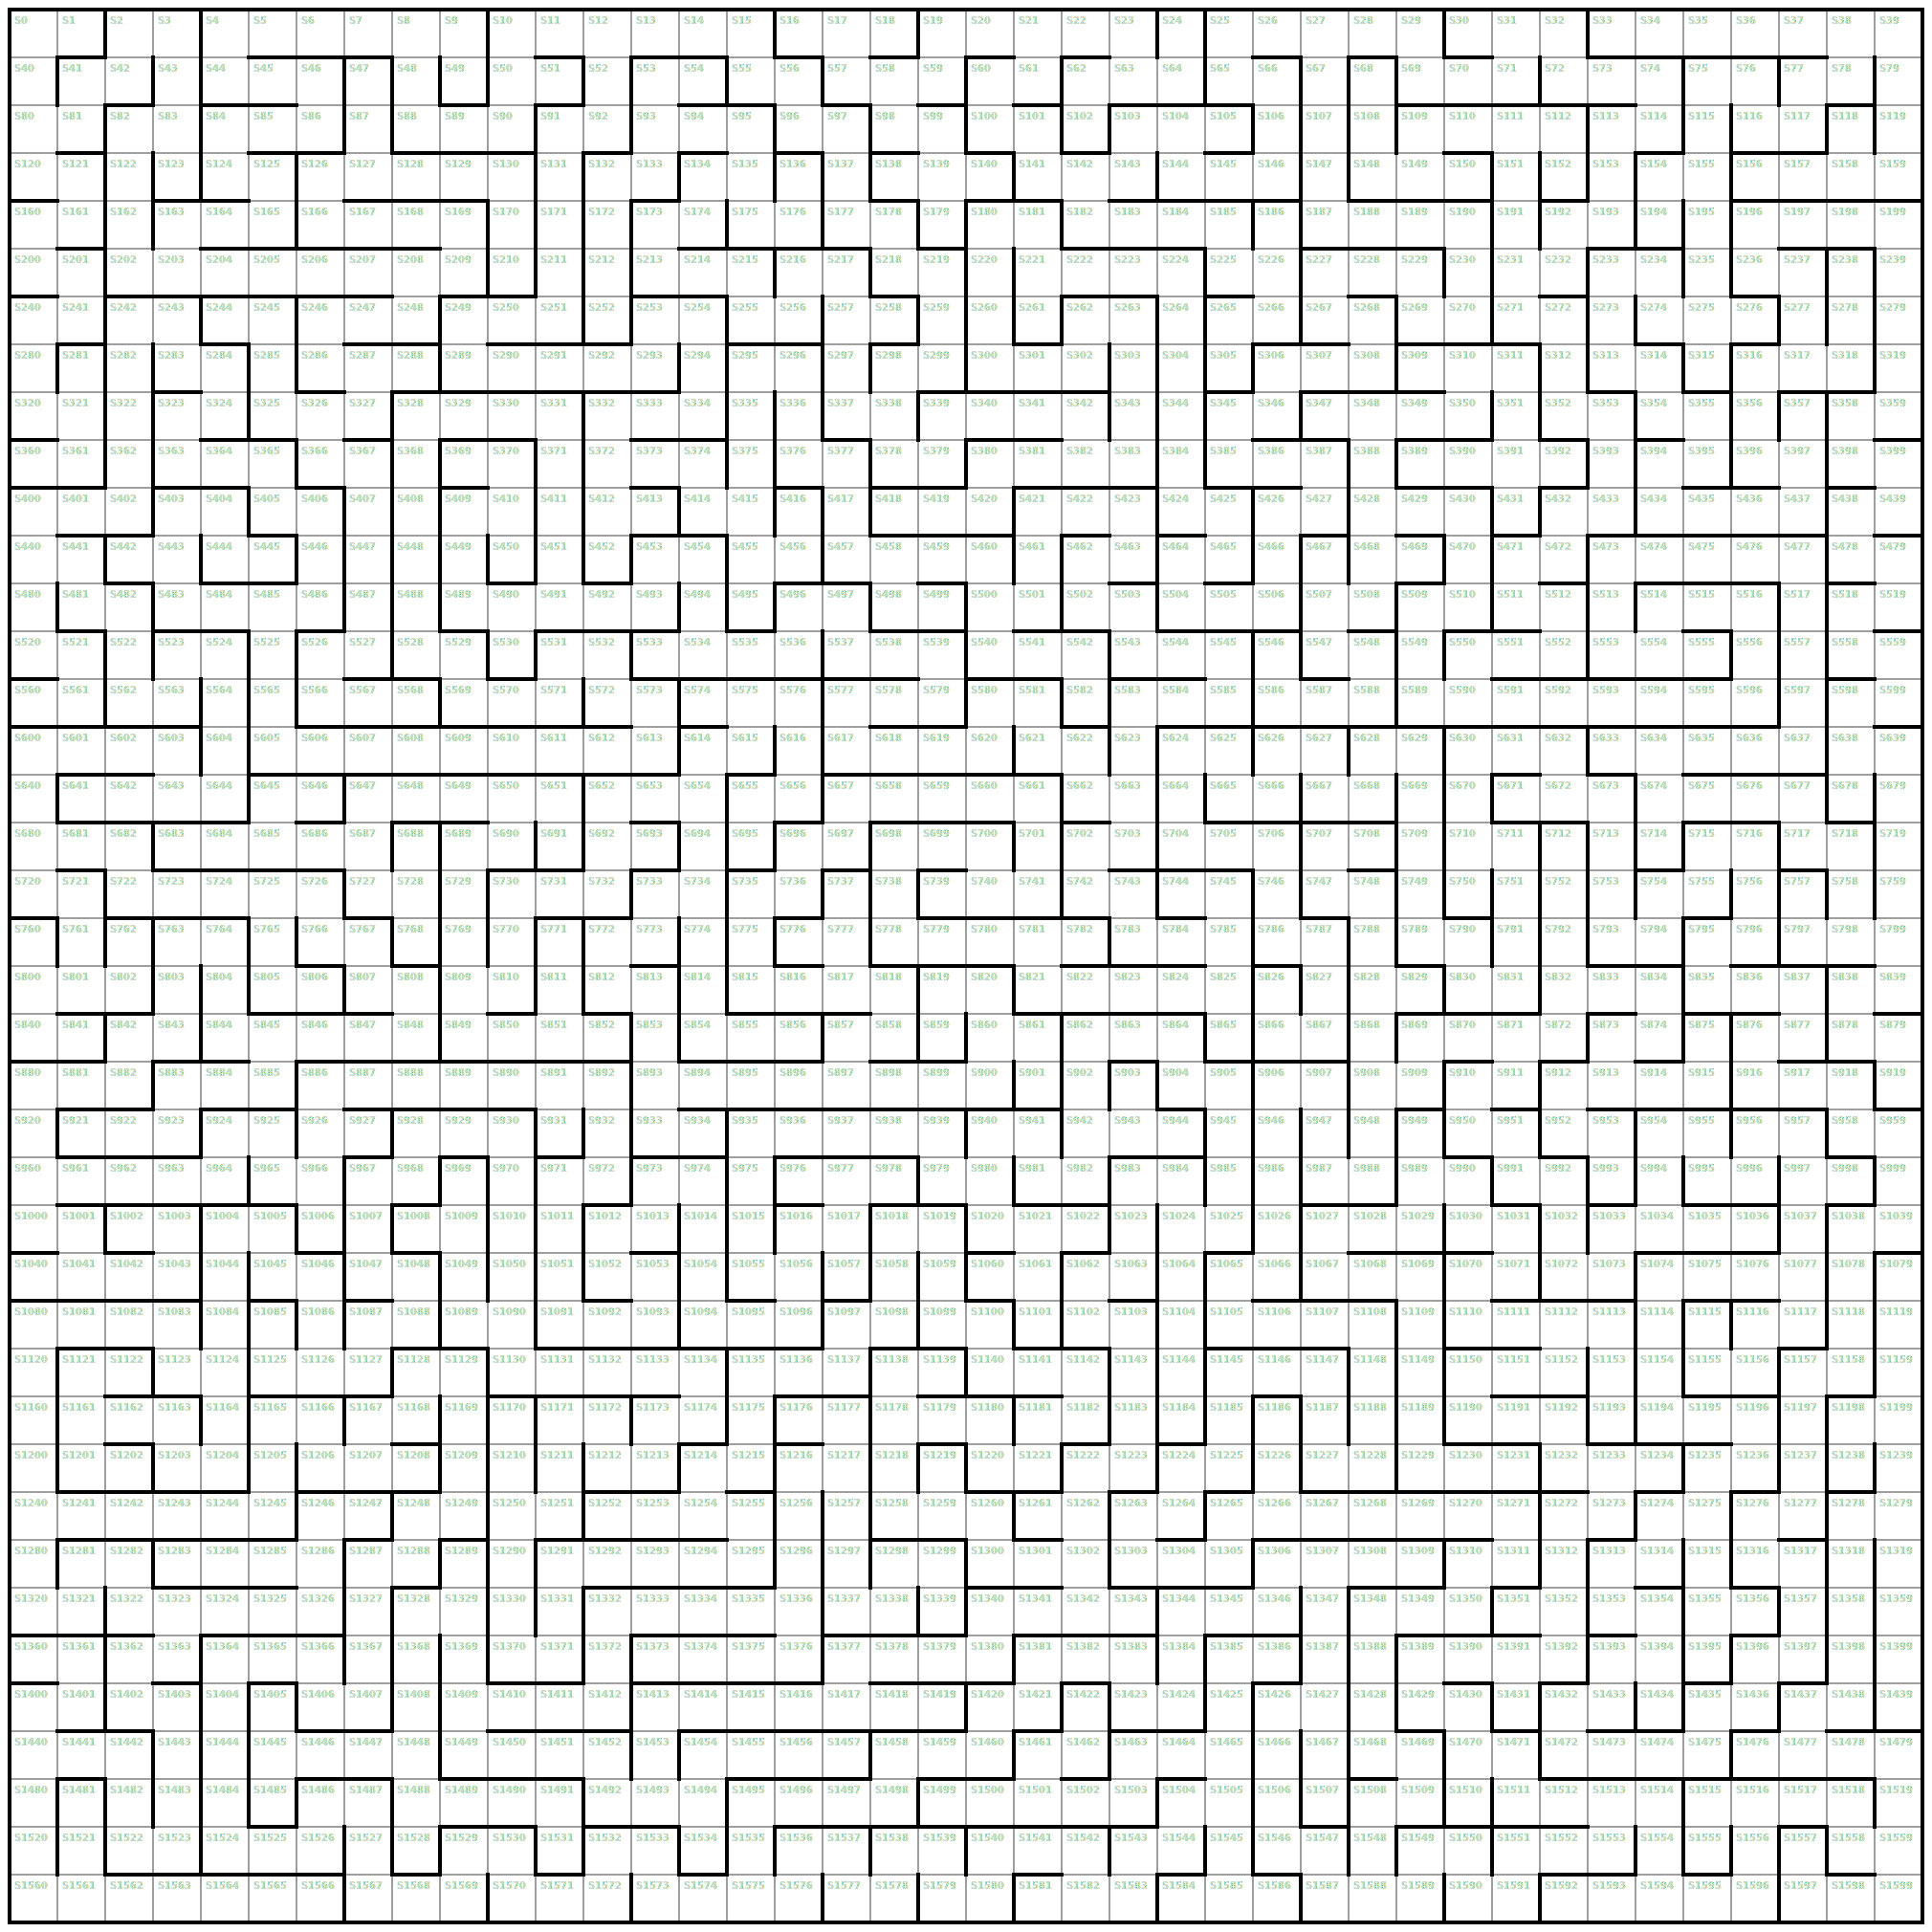

In [15]:
# ---------- Load Maze Config ---------- #
## Target maze config file
config_file = 'maze_config'
current_dir = os.getcwd()
config_path = fn.gen_path(current_dir, config_file)

## Select maze config file
mazeConfig_file = fn.select_maze(config_path)


## Read maze config file
maze_config = fn.load_mazeConfig(config_path, mazeConfig_file)

## Pass content of maze_config
maze_x = maze_config[0]
maze_y = maze_config[1]
total_state = maze_config[2]
total_act = maze_config[3]
ns_list = maze_config[4]
rt_list = maze_config[5]

## Display Maze
scale = 50*maze_x
maze_svg = 'current_maze.svg'
fn.draw_maze(scale, maze_x, maze_y, ns_list, maze_svg)
display(SVG(maze_svg))


In [16]:
# Select goal state randomly from possible candidates
possible_goals = fn.find_goals(ns_list)
goal_state = random.choice(possible_goals)
# goal_state = 67
print(possible_goals)
print(goal_state)

[1, 16, 18, 24, 30, 33, 47, 49, 51, 54, 68, 102, 105, 118, 123, 136, 138, 140, 150, 152, 156, 179, 186, 194, 210, 238, 244, 252, 258, 261, 276, 281, 288, 305, 309, 315, 347, 357, 360, 369, 389, 392, 413, 416, 418, 431, 442, 445, 450, 452, 467, 469, 495, 499, 530, 533, 546, 555, 560, 568, 574, 582, 633, 641, 646, 671, 678, 683, 688, 691, 693, 695, 708, 712, 714, 737, 739, 744, 750, 757, 760, 762, 768, 771, 776, 782, 806, 826, 829, 841, 852, 856, 859, 865, 875, 901, 903, 919, 921, 927, 931, 934, 944, 949, 969, 976, 978, 993, 998, 1002, 1006, 1008, 1022, 1036, 1040, 1057, 1060, 1079, 1085, 1101, 1115, 1122, 1139, 1170, 1176, 1184, 1186, 1193, 1202, 1208, 1219, 1231, 1234, 1238, 1247, 1252, 1261, 1283, 1289, 1309, 1339, 1343, 1351, 1356, 1360, 1373, 1386, 1395, 1405, 1419, 1422, 1431, 1434, 1439, 1457, 1476, 1481, 1485, 1499, 1507, 1510, 1528, 1531, 1534, 1555, 1557, 1566, 1581, 1584, 1586, 1592]
186


In [17]:
# Set Goal State Reward
goal_reward = 10

# Update Reward Matrix
if (goal_state > (total_state-1)):
    print("Goal State cannot be used. Try again")
else:
    for i in range(total_state):
        for j in range(total_act):
            if (ns_list[i][j]==goal_state)&(i != goal_state):
                rt_list[i][j] = goal_reward
    print('Current Reward list updated.')

Current Reward list updated.


In [22]:
# Set simulation's hyparameters
total_episode = 10000
max_step = 2*total_state
alpha = 0.625 # Learning Rate
gamma = 0.625 # Discount Factor
epsilon = 0.99

In [23]:
# Brute force learning

# Initialize Software Model
sw = ql.qrl(total_state = total_state,
            total_action = total_act,
            learning_rate = alpha, 
            discount_factor = gamma,
            initial_exploration_rate = epsilon,
            max_episode = total_episode,
            max_step = max_step,
            goal_state = goal_state,
            reward_matrix = rt_list,
            ns_matrix = ns_list,
            random_pool = possible_goals
           )

notFinished = True
while(notFinished):
    # Start software learning
    sw.start()
    
    # Check convergence
    pass_count = 0
    failed_start = []
    for start_state in possible_goals:
        if (start_state != goal_state):
            isPass, record = sw.shortest_path(start=start_state, show_step=False, quiet=True)
            if (isPass):
                pass_count += 1
            else:
                failed_start.append(start_state)
    print(f'Goal reached count: {pass_count}/{len(possible_goals)-1}')
    if (pass_count==len(possible_goals)-1):
        notFinished = False
    else:
        print(failed_start)
        total_episode += 1000
    print()
    notFinished = False
#     # Initialize Software Model
#     init_Q = sw.Q
# #     print(init_Q)
#     sw = ql.qrl(total_state = total_state,
#                 total_action = total_act,
#                 learning_rate = alpha, 
#                 discount_factor = gamma,
#                 initial_exploration_rate = epsilon,
#                 max_episode = total_episode,
#                 max_step = max_step,
#                 goal_state = goal_state,
#                 reward_matrix = rt_list,
#                 ns_matrix = ns_list,
#                 random_pool = possible_goals,
#                 Q_Matrix = init_Q
#                )

Start Q-learning...
Progress:[====================================================================================================] (100/100)Execution time = 182.0862352848053s
Finished learning for 10000 episode(s)
Goal reached count: 27/170
[1, 33, 47, 49, 51, 54, 118, 123, 136, 156, 194, 210, 238, 244, 252, 276, 281, 288, 315, 357, 360, 369, 413, 416, 442, 445, 450, 452, 495, 499, 530, 533, 560, 568, 574, 582, 641, 646, 671, 678, 683, 688, 691, 693, 695, 708, 712, 737, 739, 744, 750, 757, 760, 762, 768, 771, 776, 782, 806, 826, 829, 841, 852, 856, 859, 865, 875, 901, 903, 919, 921, 927, 931, 934, 944, 949, 969, 976, 978, 993, 998, 1002, 1006, 1008, 1022, 1036, 1040, 1057, 1060, 1079, 1085, 1101, 1115, 1122, 1139, 1170, 1176, 1184, 1186, 1193, 1202, 1208, 1219, 1231, 1234, 1238, 1247, 1252, 1261, 1283, 1289, 1309, 1339, 1343, 1351, 1356, 1360, 1373, 1386, 1395, 1405, 1419, 1422, 1431, 1434, 1439, 1457, 1476, 1481, 1485, 1499, 1507, 1510, 1528, 1531, 1534, 1555, 1557, 1566, 1581, 1584

Shortest Path from S000 to S067.
Agent requires 17 step to reach  S067 from S000


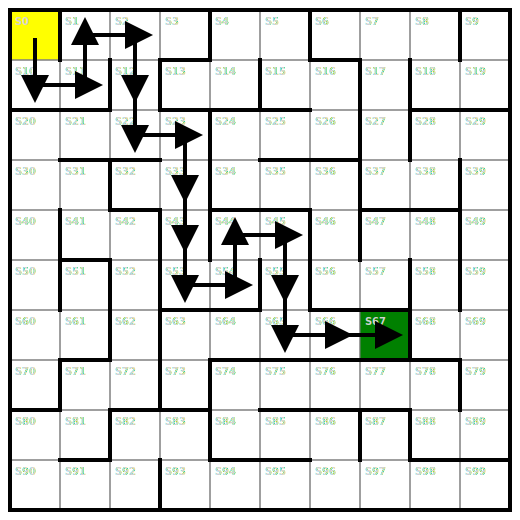

Shortest Path from S003 to S067.
Agent requires 14 step to reach  S067 from S003


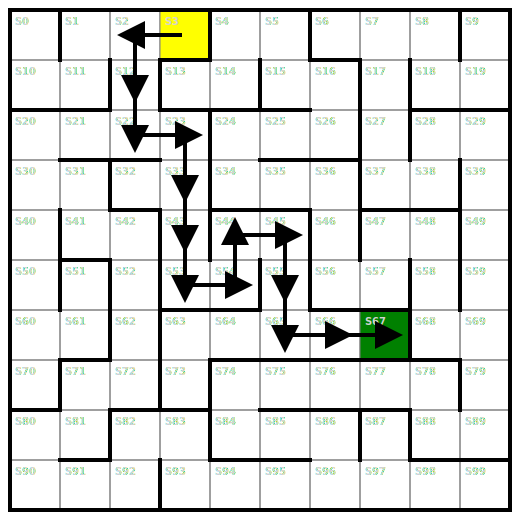

Shortest Path from S006 to S067.
Agent requires 55 step to reach  S067 from S006


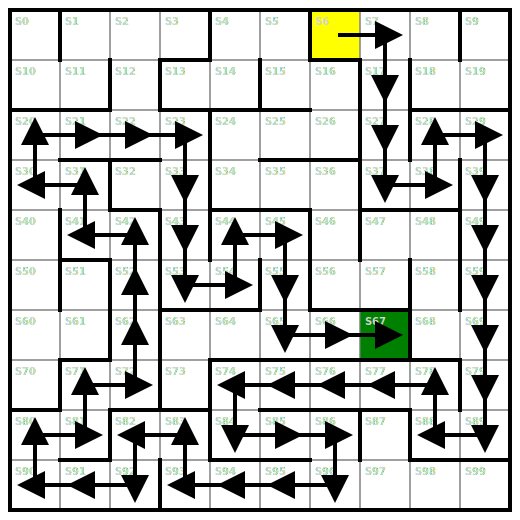

Shortest Path from S009 to S067.
Agent requires 58 step to reach  S067 from S009


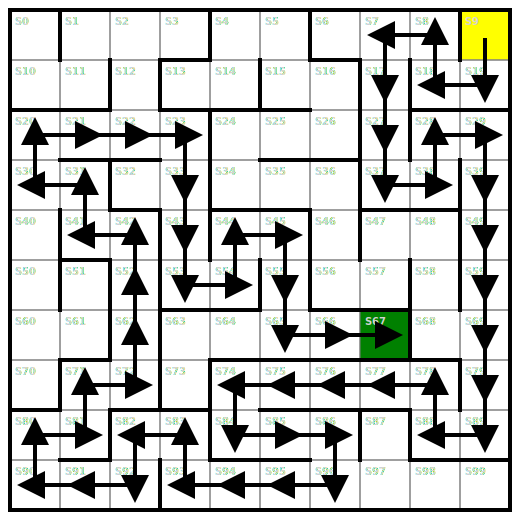

Shortest Path from S013 to S067.
Agent requires 63 step to reach  S067 from S013


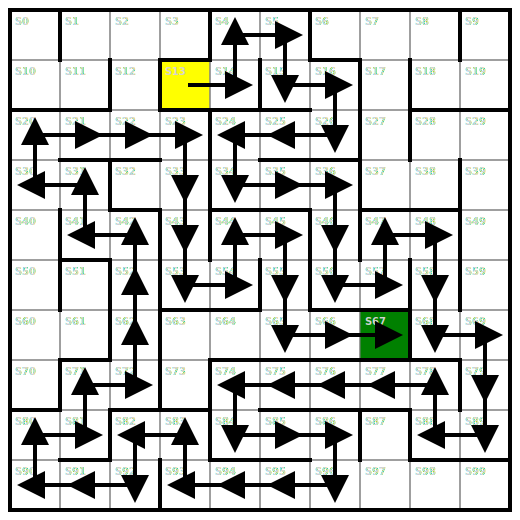

Shortest Path from S032 to S067.
Agent requires 10 step to reach  S067 from S032


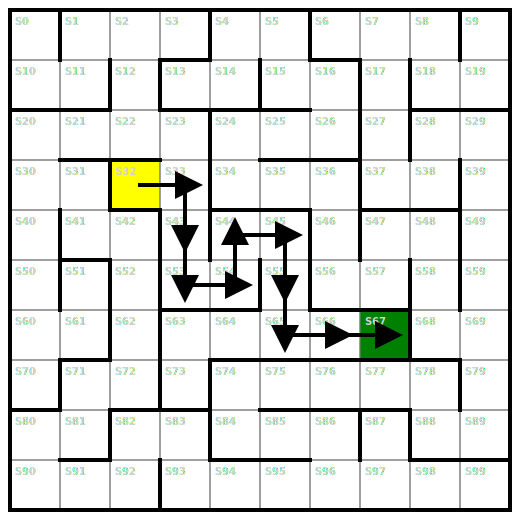

Shortest Path from S051 to S067.
Agent requires 19 step to reach  S067 from S051


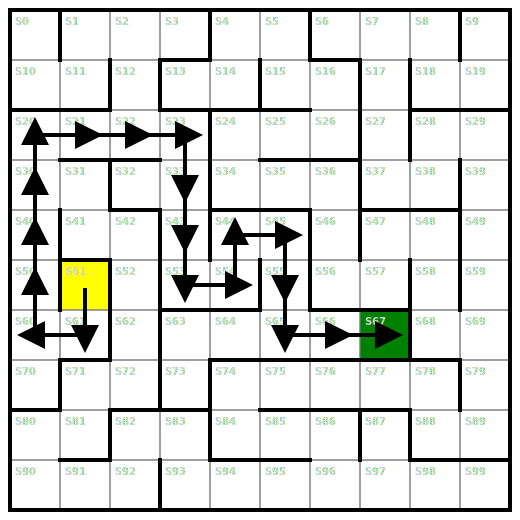

Shortest Path from S070 to S067.
Agent requires 18 step to reach  S067 from S070


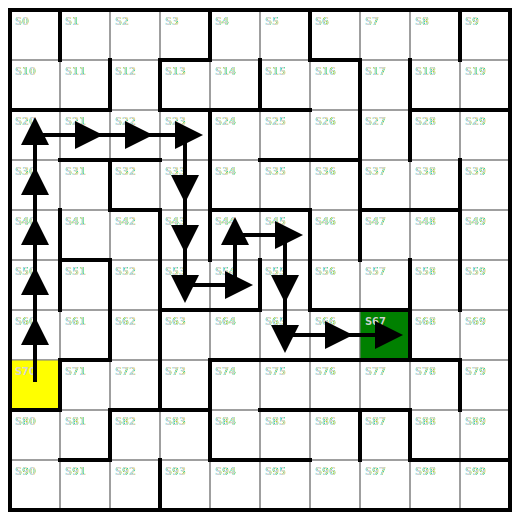

Shortest Path from S073 to S067.
Agent requires 5 step to reach  S067 from S073


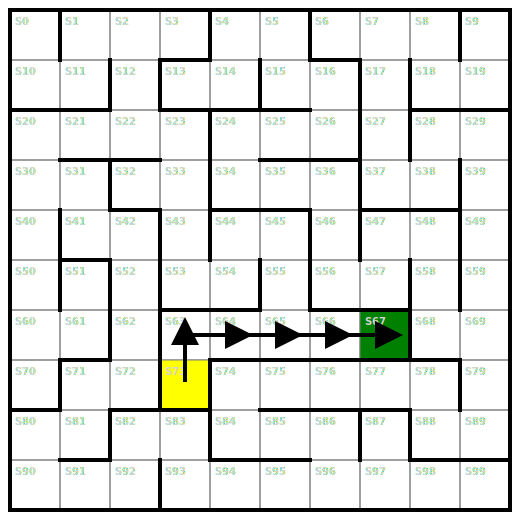

Shortest Path from S087 to S067.
Agent requires 34 step to reach  S067 from S087


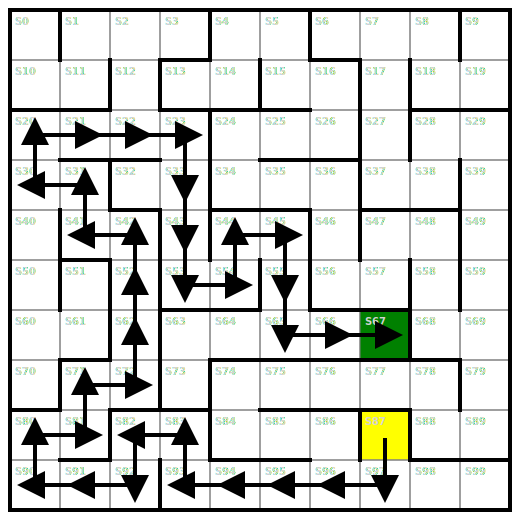

Shortest Path from S099 to S067.
Agent requires 35 step to reach  S067 from S099


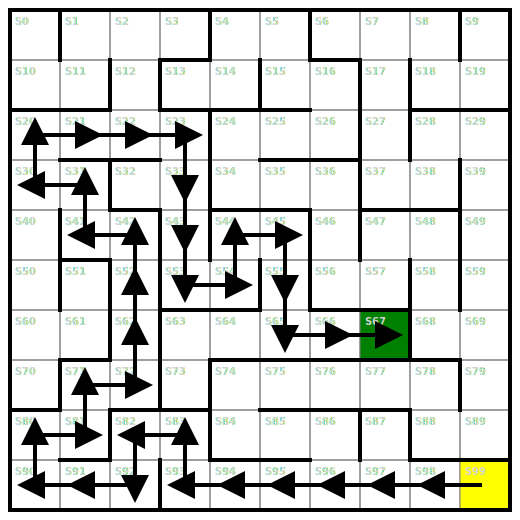

Goal reached count: 11/11


In [8]:
pass_count = 0

for start_state in possible_goals:
    if (start_state != goal_state):
        isPass, record = sw.shortest_path(start=start_state, show_step=False, quiet=False)
        if (isPass):
            pass_count += 1
#         scale = 1000
        svg_file = 'shortest_path.svg'
        h = drawSVG.drawPath(scale=scale, mx=maze_x, my = maze_y, ns = ns_list, path = record)
        h.draw_path(svg_file)
        display(SVG(svg_file))

print(f'Goal reached count: {pass_count}/{len(possible_goals)-1}')

In [9]:
# print(sw.state_visit_count)
# print()
# print(sw.cumulative_rewards)
# print()
# print(sw.step_per_episode)
# print()
# print(sw.exploration_per_episode)
# print()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

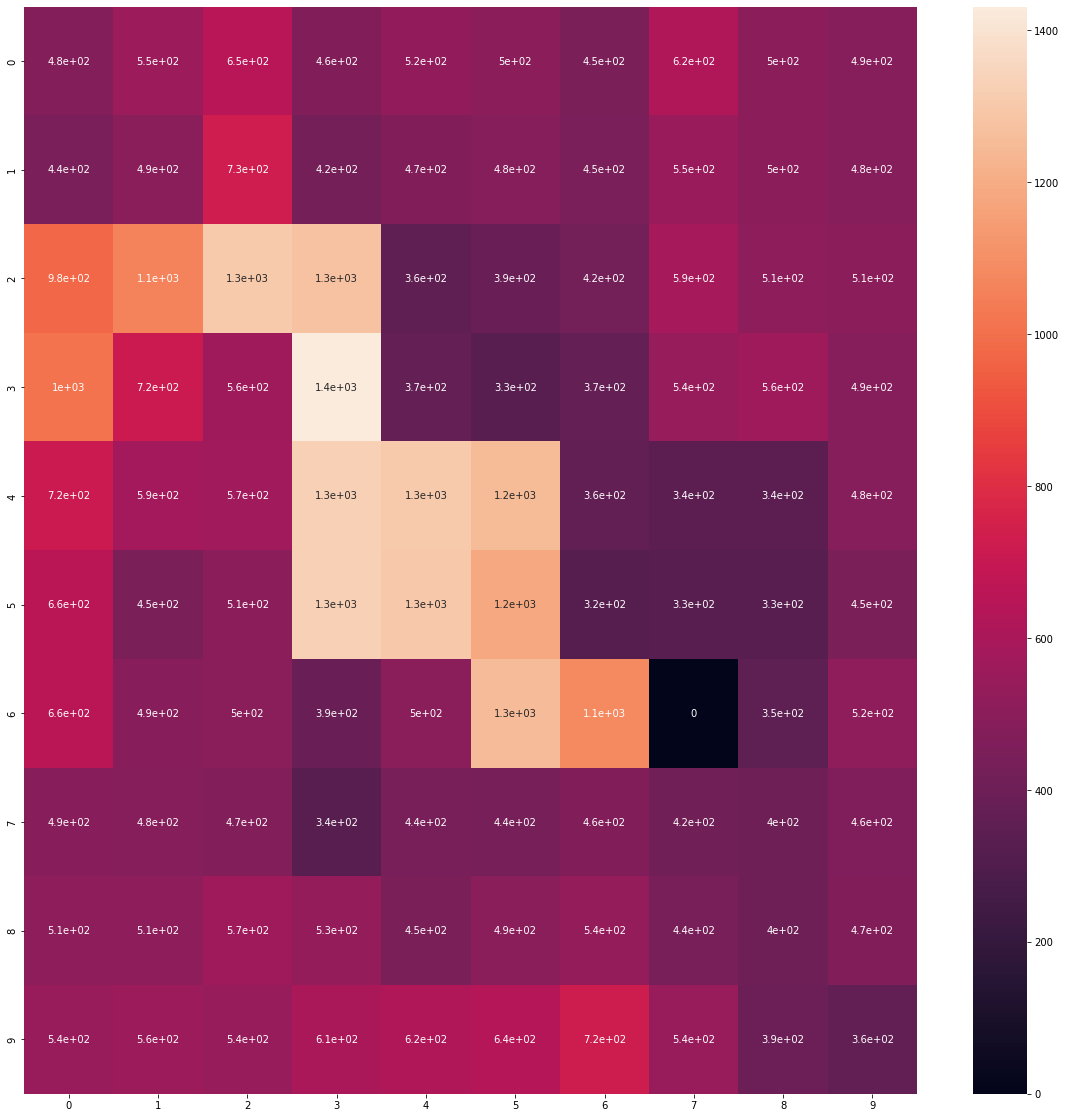

In [11]:
isc = sw.state_visit_count.reshape(-1, maze_x).tolist()
fig, ax = plt.subplots(figsize = (20, 20))
sb.heatmap(isc, annot=True)
plt.show()

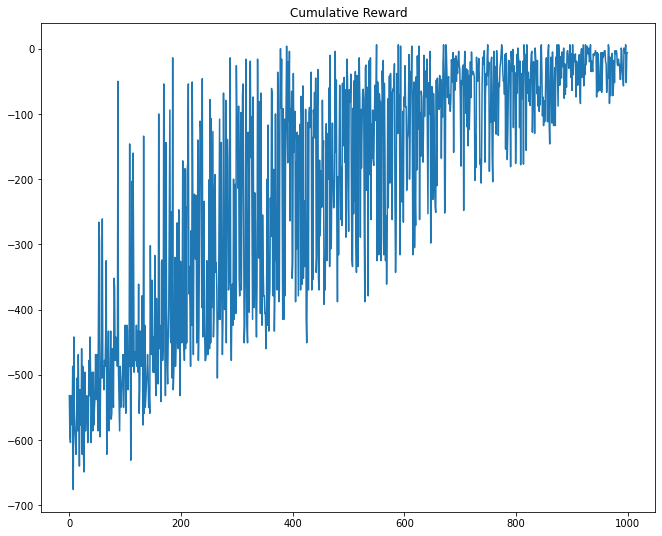

In [12]:
fig, ax = plt.subplots(figsize = (11, 9))
ax.title.set_text('Cumulative Reward')
ax.plot(sw.cumulative_rewards)
plt.show()

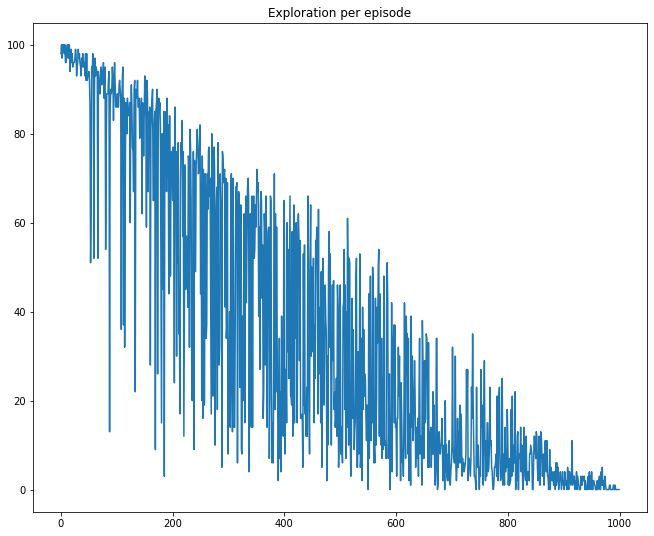

In [13]:
fig, ax = plt.subplots(figsize = (11, 9))
ax.title.set_text('Exploration per episode')
ax.plot(sw.exploration_per_episode)
plt.show()

In [14]:
sw.step_per_episode

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 99,
 100,
 100,
 100,
 100,
 52,
 66,
 100,
 100,
 100,
 100,
 56,
 100,
 100,
 100,
 100,
 100,
 100,
 57,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 57,
 90,
 100,
 100,
 100,
 100,
 100,
 16,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 40,
 100,
 100,
 100,
 43,
 100,
 36,
 78,
 100,
 100,
 89,
 100,
 100,
 100,
 100,
 100,
 75,
 100,
 100,
 100,
 100,
 100,
 75,
 100,
 100,
 28,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 70,
 100,
 100,
 87,
 100,
 100,
 100,
 100,
 76,
 100,
 100,
 79,
 100,
 100,
 100,
 30,
 100,
 100,
 100,
 100,
 77,
 83,
 100,
 100,
 11,
 100

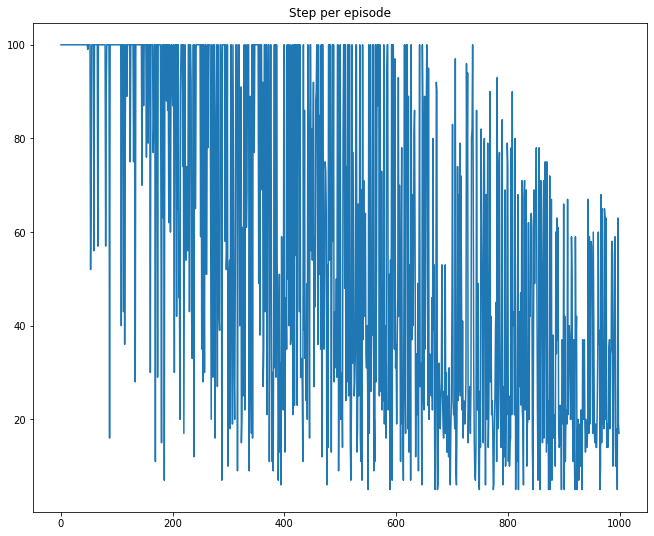

In [15]:
fig, ax = plt.subplots(figsize = (11, 9))
ax.title.set_text('Step per episode')
ax.plot(sw.step_per_episode)
plt.show()

In [16]:
import numpy as np

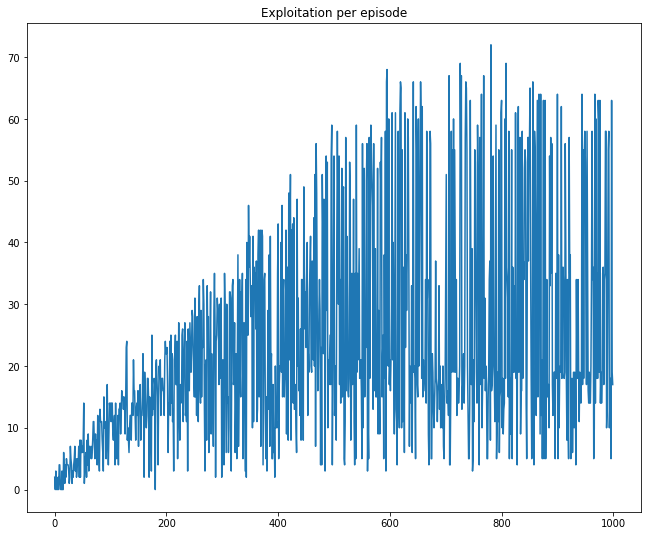

In [17]:
array1 = np.array(sw.step_per_episode)
array2 = np.array(sw.exploration_per_episode)
subtracted_array = np.subtract(array1, array2)
step_per_episode = list(subtracted_array)

fig, ax = plt.subplots(figsize = (11, 9))
ax.title.set_text('Exploitation per episode')
ax.plot(step_per_episode)
plt.show()

In [18]:
total_state // 25

4

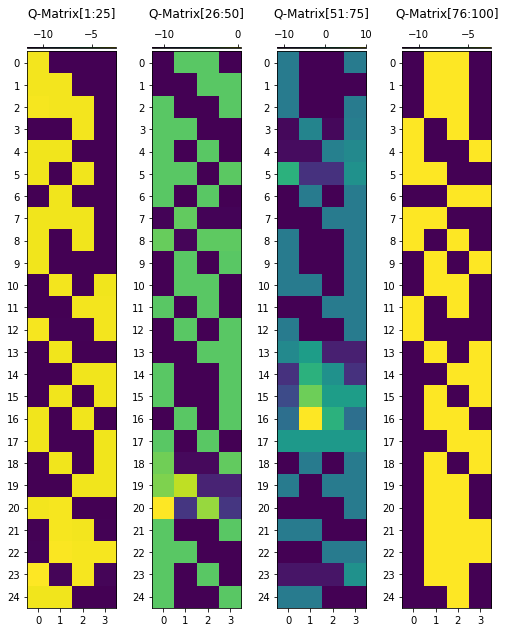

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker

n_graph = total_state//25

fig, ax = plt.subplots(1, n_graph, figsize=(7, 70))
for i in range(n_graph):
    start_slice = i*25
    end_slice = start_slice+25
    im1 = ax[i].imshow(sw.Q[start_slice:end_slice], interpolation='none')
    ax[i].set_title(f"Q-Matrix[{start_slice+1}:{end_slice}]", pad=35)
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[i].yaxis.set_major_locator(ticker.MultipleLocator(1))

    divider1 = make_axes_locatable(ax[i])
    cax1 = divider1.append_axes("top", size="0.2%", pad=0.05)
    plt.colorbar(im1, cax=cax1, orientation="horizontal")
    cax1.xaxis.set_ticks_position("top")
fig.tight_layout(pad=1.0)
plt.show()